# TP : Introduction : Python, Numpy, Pandas

## Imports

In [2]:
import math
import numpy as np
from sklearn import linear_model
from os import mkdir

## Help

In [7]:
help(mkdir)

Help on built-in function mkdir in module posix:

mkdir(path, mode=511, *, dir_fd=None)
    Create a directory.
    
    If dir_fd is not None, it should be a file descriptor open to a directory,
      and path should be relative; path will then be relative to that directory.
    dir_fd may not be implemented on your platform.
      If it is unavailable, using it will raise a NotImplementedError.
    
    The mode argument is ignored on Windows.



In [8]:
linear_model.LinearRegression?

## Version de Package, localisation des fonctions

In [9]:
print(np.__version__)

1.15.2


In [10]:
from inspect import getsourcelines
getsourcelines(linear_model.LinearRegression)

(['class LinearRegression(LinearModel, RegressorMixin):\n',
  '    """\n',
  '    Ordinary least squares Linear Regression.\n',
  '\n',
  '    Parameters\n',
  '    ----------\n',
  '    fit_intercept : boolean, optional, default True\n',
  '        whether to calculate the intercept for this model. If set\n',
  '        to False, no intercept will be used in calculations\n',
  '        (e.g. data is expected to be already centered).\n',
  '\n',
  '    normalize : boolean, optional, default False\n',
  '        This parameter is ignored when ``fit_intercept`` is set to False.\n',
  '        If True, the regressors X will be normalized before regression by\n',
  '        subtracting the mean and dividing by the l2-norm.\n',
  '        If you wish to standardize, please use\n',
  '        :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on\n',
  '        an estimator with ``normalize=False``.\n',
  '\n',
  '    copy_X : boolean, optional, default True\n',
  '        I

## Introduction à Python, Numpy, Scipy

##### 1) Écrire une fonction nextpower qui calcule la première puissance de 2 supérieure ou égale à un nombre n (on veillera à ce que le type de sortie soit un int, tester cela avec type par exemple).

In [22]:
def nextpower(x) :
    i = 0
    while i < x :
        if (2 ** i >= x) :
            return i
        i = i + 1


nextpower(4)

2

##### 2) En partant du mot contenant toutes les lettres de l’alphabet, générer par une opération de slicing la chaîne de caractère cfilorux et, de deux façons différentes, la chaîne de caractère vxz.

In [29]:
mot = 'abcdefghijklmnopqrstuvwxyz'
print(mot[2]+mot[5]+mot[8]+mot[11]+mot[14]+mot[17]+mot[20]+mot[23])

cfilorux


###### Ou on peut le réaliser à travers une fonction

In [40]:
def slicing(mot) :
    i = 2
    while i <= len(mot) -2 :
        print(mot[i])
        i = i + 3

alphabet = 'abcdefghijklmnopqrstuvwxyz'
slicing(alphabet)

c
f
i
l
o
r
u
x


###### On peut retourner la chaîne 'vxz' de cette manière

In [41]:
print(mot[21]+mot[23]+mot[25])

vxz


###### Ou en modifiant notre fonction

In [42]:
def slicing(mot, start, step) :
    i = start
    while i <= len(mot) - (step -1) :
        print(mot[i])
        i = i + step

alphabet = 'abcdefghijklmnopqrstuvwxyz'
slicing(alphabet, 21, 2)

v
x
z


##### 3) Afficher le nombre π avec 9 décimales après la virgule.

In [51]:
print(round(math.pi,9))

3.141592654


##### 4) Compter le nombre d’occurrences de chaque caractère dans la chaîne de caractères s="HelLo WorLd!!". On renverra un dictionnaire qui à chaque lettre associe son nombre d’occurrences.

In [60]:
def occurence(s) :
    dico = {}.fromkeys(set(s),0)
    for valeur in s :
        dico[valeur] = dico[valeur] + 1
    print(dico)

occurence("HelLo WorLd!!")

{'W': 1, 'e': 1, 'H': 1, 'o': 2, 'r': 1, 'd': 1, 'L': 2, '!': 2, ' ': 1, 'l': 1}


##### 5) Écrire une fonction de codage par inversion de lettres : chaque lettre d’un mot est remplacée par une (et une seule) autre. On se servira de la fonction shuffle sur la chaîne de caractères contenant tout l’alphabet pour associer les lettres codées.

In [152]:
import random

def cesar(s) :
    #Alphabet
    mot = 'abcdefghijklmnopqrstuvwxyz'
    #Transformé en liste
    liste = list(mot)
    #Et shufflé
    shuffle = random.shuffle(l)
    
    #Crée deux listes vides
    value = list()
    index2 = list()
    
    #Récupérer l'index de chaque lettre du mot dans l'alphabet
    for x in list(s) :
        #Retourne l'index dans l'alphabet de chaque lettre du mot
        index2.append(liste.index(x))
        #on ajoute pour chaque index le shuffle correspondant
        value.append(shuffle[x])

    #Regrouper l'affichage en un mot
    print(value)

cesar("moto")

TypeError: 'NoneType' object is not subscriptable

##### 6) Calculer 2 * Somme (k=1 à l'infini) (4k^2) / (4k^2 -1)

In [230]:
import timeit

def f(k) :
    return (4*(k**2)/(4*(k**2) -1))

def produit(n) :
    k = 1
    s = f(k)
    #start = timeit.default_timer()
    while k < n :
        p = s
        k += 1
        s = s*f(k)
        #stop = timeit.default_timer()
    return 2*s, 'Time :', stop-start, 'secondes'

produit(800000)

(3.1415916718428796, 'Time :', 0.7105063360068016, 'secondes')

In [216]:
import pandas as pd
from functools import reduce 

start = timeit.default_timer()

#List compregension
series = pd.Series(range(1,800000)).apply(lambda x : 4*(x**2)/(4*(x**2) -1))

stop = timeit.default_timer()

print(2*np.prod(series), 'Time :', stop-start, 'secondes')



3.1415916718416526 Time : 0.7105063360068016 secondes


In [229]:
def foo(n):
    arr = np.arange(1, n)
    res = 4 * arr ** 2 / (4 * arr ** 2 - 1)
    return 2 * np.prod(res)

In [228]:
%timeit foo(800000)

7.91 ms ± 41.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [231]:
%timeit (800000)

8.28 ns ± 0.34 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [ ]:
#Le temps d'exécution global est comparable, même si légèrement plus élevé pour la deuxième solution

##### 7) Créer une fonction quicksort qui trie une liste, en remplissant les éléments manquants dans le code suivant. On testera que la fonction est correcte sur l’exemple quicksort([-2, 3, 5, 1, 3]) :

In [1]:
def quicksort(ll):
    """ a sorting algorithm with a pivot value"""
    if len(ll) <= 1:
        return ll
    else:
        pivot = ll[-1] # pivot = last element of the list ll. 
        a = ll.pop()
        less = [] 
        greater = []
        for x in ll:
            if x <= pivot:
                less.append(x) # append 'x' to 'less'
            else:
                greater.append(x) # append 'x' to 'greater'
    return less + [pivot] + greater

quicksort([1,2,3,7,8,3,1,2,5])

[1, 2, 3, 3, 1, 2, 5, 7, 8]

##### 8) Sans utiliser de boucles for / while : créer une matrice M 5*6 aléatoire à coefficients uniformes dans [-1,1], puis remplacer une colonne sur deux par sa valeur moins le double de la colonne suivante. Remplacer enfin les valeurs négatives par 0 en utilisant un masque binaire.

In [34]:
import numpy as np
matrix = np.random.uniform(-1,1, (5,6))
print(matrix)

[[-0.02102115  0.05941251  0.14154924  0.16082637  0.83565587  0.71794218]
 [ 0.79905366 -0.12663962  0.96398145  0.6571805  -0.82015509 -0.41668485]
 [ 0.52510322 -0.35131305  0.883636   -0.77866764  0.69616679 -0.25259815]
 [-0.15784525 -0.93528663  0.51071465  0.85786751  0.10510475  0.97431605]
 [ 0.20608378  0.42964826  0.82541801  0.22074989 -0.29743418 -0.40587696]]


In [35]:
m_sol = matrix.copy()
m_sol[:,0] = m_sol[:,0] - 2*m_sol[:,1]
m_sol[:,2] = m_sol[:,2] - 2*m_sol[:,3]
m_sol[:,4] = m_sol[:,4] - 2*m_sol[:,5]
m_sol[m_sol>=0] = 0
print(m_sol)

[[-0.13984618  0.         -0.1801035   0.         -0.6002285   0.        ]
 [ 0.         -0.12663962 -0.35037956  0.          0.         -0.41668485]
 [ 0.         -0.35131305  0.         -0.77866764  0.         -0.25259815]
 [ 0.         -0.93528663 -1.20502037  0.         -1.84352735  0.        ]
 [-0.65321274  0.          0.          0.          0.         -0.40587696]]


In [36]:
mat = np.random.uniform(-1,1,(5,20))
G = mat.T.dot(mat)
print(G)

[[ 2.14538145  0.32788235  0.95299158  0.30970177 -1.19969991  0.49405284
   0.99534781 -0.80376331 -0.72832798 -0.36103137 -0.46694152 -0.0370903
  -0.07632494 -0.24745505 -0.65640326 -1.3850298   0.29348919 -1.75082471
  -1.54175925  1.48783166]
 [ 0.32788235  0.70785653  0.62971093  1.09150328  0.31924651 -0.01118129
  -0.22938511 -0.15231054 -0.13105484  0.39476067  0.46108835 -0.00672319
  -0.48783475  0.35302148 -0.10978286 -0.86429799  0.35344723 -0.04694636
  -0.33689617  0.30910206]
 [ 0.95299158  0.62971093  1.35877071  0.82259303  0.18292999 -0.44656517
   0.92031732  0.13718419 -0.29644186  0.6090136  -0.30187807  0.48729908
   0.05440945  0.20242778 -1.09517267 -0.99416321 -0.14692586 -0.75053261
  -0.50240766  1.12090639]
 [ 0.30970177  1.09150328  0.82259303  1.90117166  0.63717532 -0.20813471
  -0.64539982  0.10753838 -0.42979829  0.93722119  0.95901228  0.38105265
  -0.67574735  0.66590281  0.35808405 -1.53358022  0.65119927 -0.04220908
  -0.56534216  0.24958902]
 [-1.

In [37]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

print(is_pos_def(G))

False


In [74]:
import pandas as pd
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1']
df = pd.read_csv('/Users/maelfabien/household.txt', sep = ';', na_values = na_values, usecols = fields)

In [76]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0


In [78]:
null_data = df[df.isnull().any(axis=1)]

In [80]:
print(str(df.isnull().sum().sum()))

129895


In [82]:
print(null_data.shape[0])

25979


In [84]:
df['Sub_metering_1'] = df['Sub_metering_1']*60./1000.

In [86]:
df.dropna(axis=0)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0


In [88]:
df['Sub_metering_1'] = df['Sub_metering_1'] * 60. / 1000.

In [90]:
date = pd.to_datetime(df['Date']+ ' ' + df['Time'], dayfirst = True)
df.set_index(date, inplace=True)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0


In [92]:
del df['Date']
del df['Time']

KeyError: 'Date'

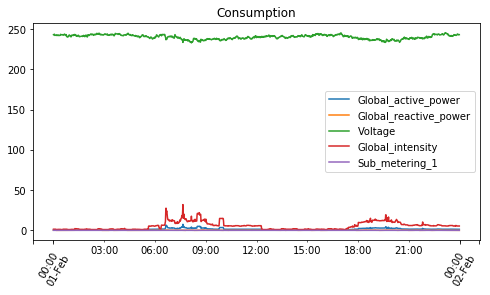

In [94]:
import matplotlib.pyplot as plt

day_target = '02/01/2007'
df[day_target:day_target].plot(figsize=(8,4))
plt.xticks(rotation=60)
plt.legend()
plt.title("Consumption")
plt.show()

In [95]:
ts = df.resample("D").mean()
day_init = '01/01/2007'
day_end = '04/30/2007'
small_ts = ts[day_init:day_end]
print(small_ts)
np.sum(pd.Series(small_ts['Global_active_power']).values)

            Global_active_power  Global_reactive_power     Voltage  \
2007-01-01             1.909031               0.102893  240.128979   
2007-01-02             0.881414               0.132182  241.943778   
2007-01-03             0.704204               0.136617  243.557090   
2007-01-04             2.263481               0.140487  239.750299   
2007-01-05             1.884281               0.120246  240.495764   
2007-01-06             1.047485               0.133464  239.673056   
2007-01-07             1.699736               0.170885  240.902486   
2007-01-08             1.556500               0.144144  239.576951   
2007-01-09             1.297954               0.143922  240.487521   
2007-01-10             1.496389               0.158647  241.027451   
2007-01-11             1.566107               0.159736  241.155687   
2007-01-12             1.014789               0.138292  241.538208   
2007-01-13             2.213065               0.201900  239.283611   
2007-01-14          

nan

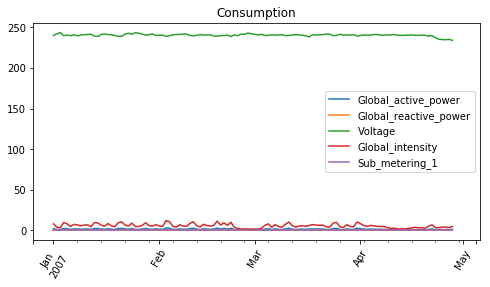

In [96]:
small_ts.plot(figsize=(8,4))
plt.xticks(rotation=60)
plt.title("Consumption")
plt.legend()
plt.show()

In [103]:
df2 = pd.read_csv('/Users/maelfabien/Autre/myfile.txt', sep=',', comment='#',na_values = "-9999")

In [109]:
df2.head()

,STAID,SOUID,DATE,TG,Q_TG
0,11249,71642,19210301,50.0,0
1,11249,71642,19210302,46.0,0
2,11249,71642,19210303,46.0,0
3,11249,71642,19210304,31.0,0
4,11249,71642,19210305,95.0,0


In [117]:
df2['DATE']

KeyError: 'DATE'